**Import Essential Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load the Data**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Projects/Online Payments Fraud Detection/PS_20174392719_1491204439457_log.csv')

In [3]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


**Check transaction type**

In [6]:
df['type'].value_counts()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


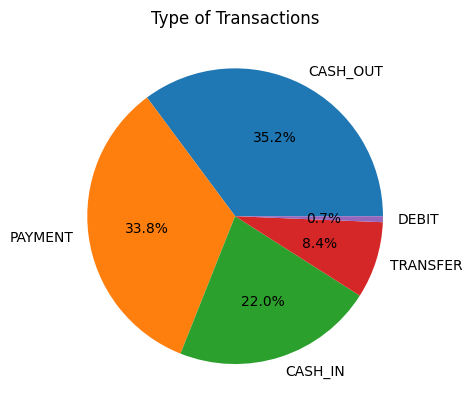

In [7]:
type = df['type'].value_counts()
plt.pie(type.values, labels = type.index, autopct='%.1f%%')
plt.title("Type of Transactions")
plt.show()

**Check For null/missing values**

In [8]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


Insights : No Null/Missing Values Found

**Check For Duplicates**

In [9]:
df.duplicated().sum()

np.int64(0)

Insights : No Duplicate Values Found

**Outlier Analysis**

In [10]:
# for col in df.columns:
#   if df[col].dtype != 'object':
#     sns.boxplot(df[col])
#     plt.show()

Insights : No significant outliers found

**Seperate X, y features & remove unwanted features**




In [11]:
X = df.drop(columns = ['isFraud','isFlaggedFraud','nameOrig','nameDest'])
y = df['isFraud']

**Label Encoding**

In [12]:
# import library for Label encoding
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

for col in X.columns:
  if X[col].dtype == 'object':
    X[col] = le.fit_transform(X[col])

In [14]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9839.64,170136.0,160296.36,0.0,0.0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0


**Feature Scaling**

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
# std_scaler = StandardScaler()
# scaled_data = std_scaler.fit_transform(X)
# X[X.columns] = scaled_data

In [17]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9839.64,170136.0,160296.36,0.0,0.0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0


**Model Building**

Splitting Training And Testing Data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

Train Model

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
decision_tree_model = DecisionTreeClassifier(max_depth=6, class_weight='balanced')
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6)

In [31]:
y_pred = decision_tree_model.predict(X_test)
y_pred_train = decision_tree_model.predict(X_train)

In [32]:
from sklearn.metrics import *
accuracy_score(y_train, y_pred_train)   #training accuracy

0.9561934728595632

In [33]:
from sklearn.metrics import *
accuracy_score(y_test, y_pred)

0.9561779057474227

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98   1906351
           1       0.03      0.99      0.05      2435

    accuracy                           0.96   1908786
   macro avg       0.51      0.97      0.52   1908786
weighted avg       1.00      0.96      0.98   1908786



Insights:
* The accuracy score is unrealistic
* There is imbalance in classes
* The precision and f1 score for class 1 is very low

**Using SMOTE to tackle imbalance in the data**

In [28]:
from imblearn.over_sampling import BorderlineSMOTE

In [29]:
blsmote = BorderlineSMOTE(sampling_strategy='minority', kind='borderline-1')
X_resampled, y_resampled = blsmote.fit_resample(X, y)
y_resampled.value_counts()

,count
isFraud,
0,6354407
1,6354407


In [35]:
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

**Train Model On Resampled Data**

In [40]:
dec_tree_model_resampled = decision_tree_model.fit(X_resampled_train, y_resampled_train)

In [41]:
y_pred_resampled = dec_tree_model_resampled.predict(X_resampled_test)

In [42]:
accuracy_score(y_pred_resampled, y_resampled_test)

0.9830133651327838

**Use Random Forest**

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
y_pred_forest = forest_model.predict(X_test)

In [45]:
accuracy_score(y_pred, y_test)

0.9561779057474227

We are getting a accuracy score of 0.9561 using Random Forest and 0.9561 using Decision Tree as well